# Employee-Attrition-Prediction






## Loading the Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/ANN /Employee.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  


Checking the datasaet
  

In [ ]:
print(df.info())

# Check the data types and non-null values
print(df.describe())

# Summarize numerical columns:
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None
       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std    

In [ ]:
# Missing values
print(df.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64






**>There are no missing values in the dataset**






In [ ]:
#Remove Duplicates

df.duplicated().sum()

df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


**> 2764 entries left**

#### Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_score, recall_score, f1_score

## PREPROCESSING  

### Visualising The Data

#### Part A

#### 1: Produce Q-Q Plots and Histograms

Histrograms


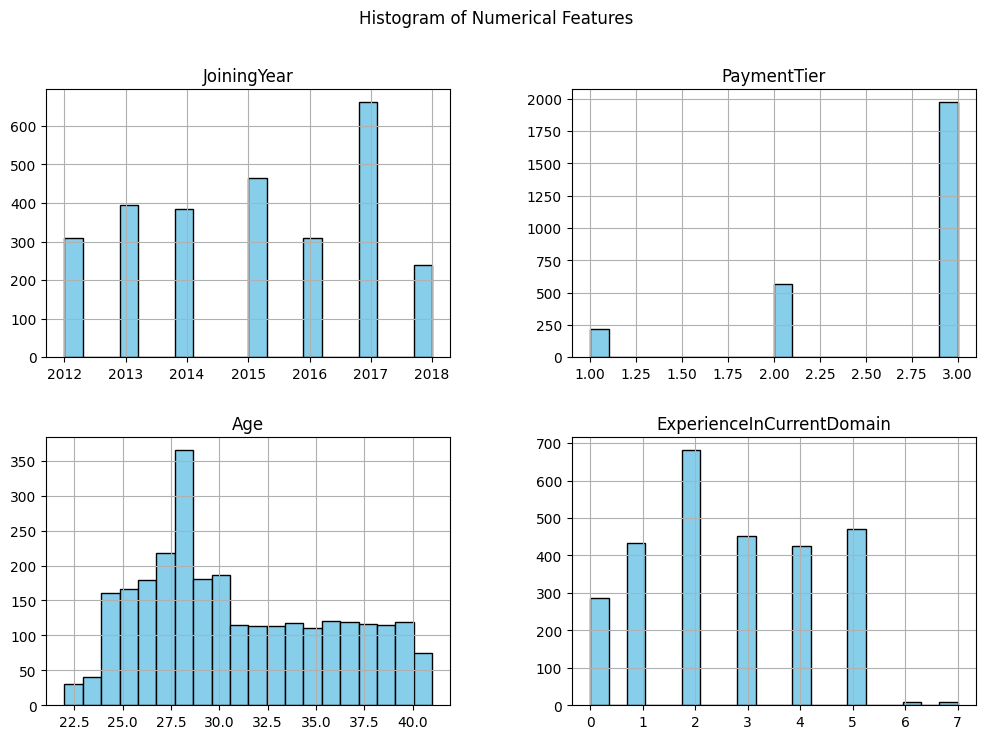

In [ ]:
# Checking the Distribution

numerical_columns = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']


df[numerical_columns].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Numerical Features')
plt.show()


Q-Q Plots

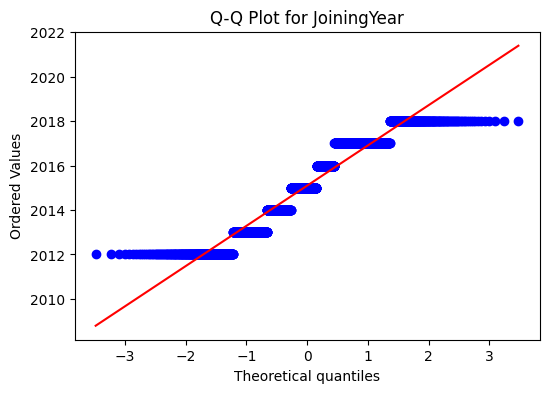

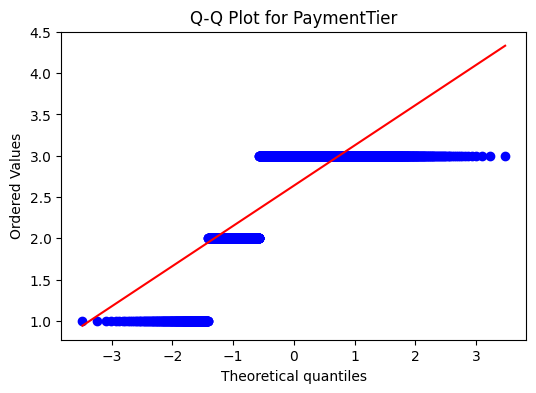

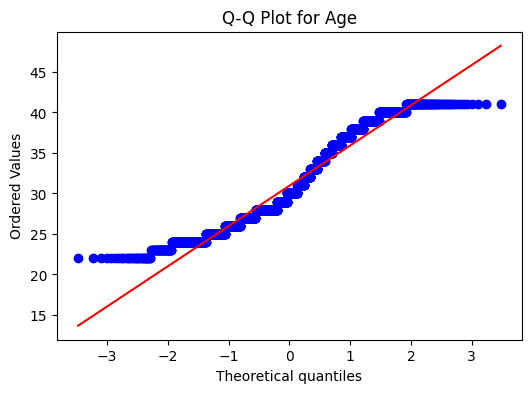

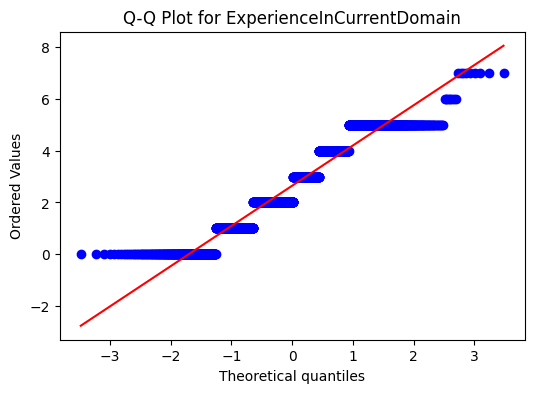

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()


Plot Pairplots

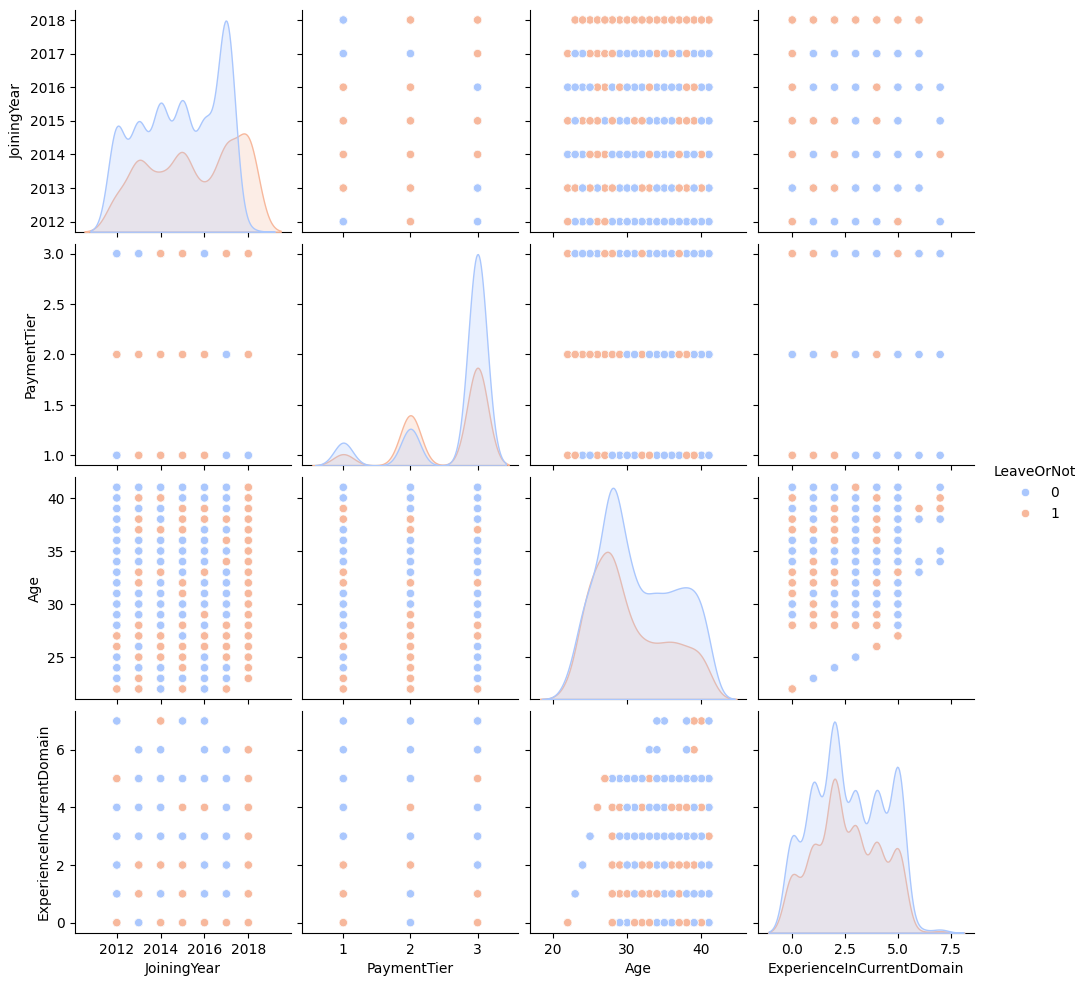

In [ ]:
sns.pairplot(df[numerical_columns + ['LeaveOrNot']], hue='LeaveOrNot', palette='coolwarm')
plt.show()


Boxplots

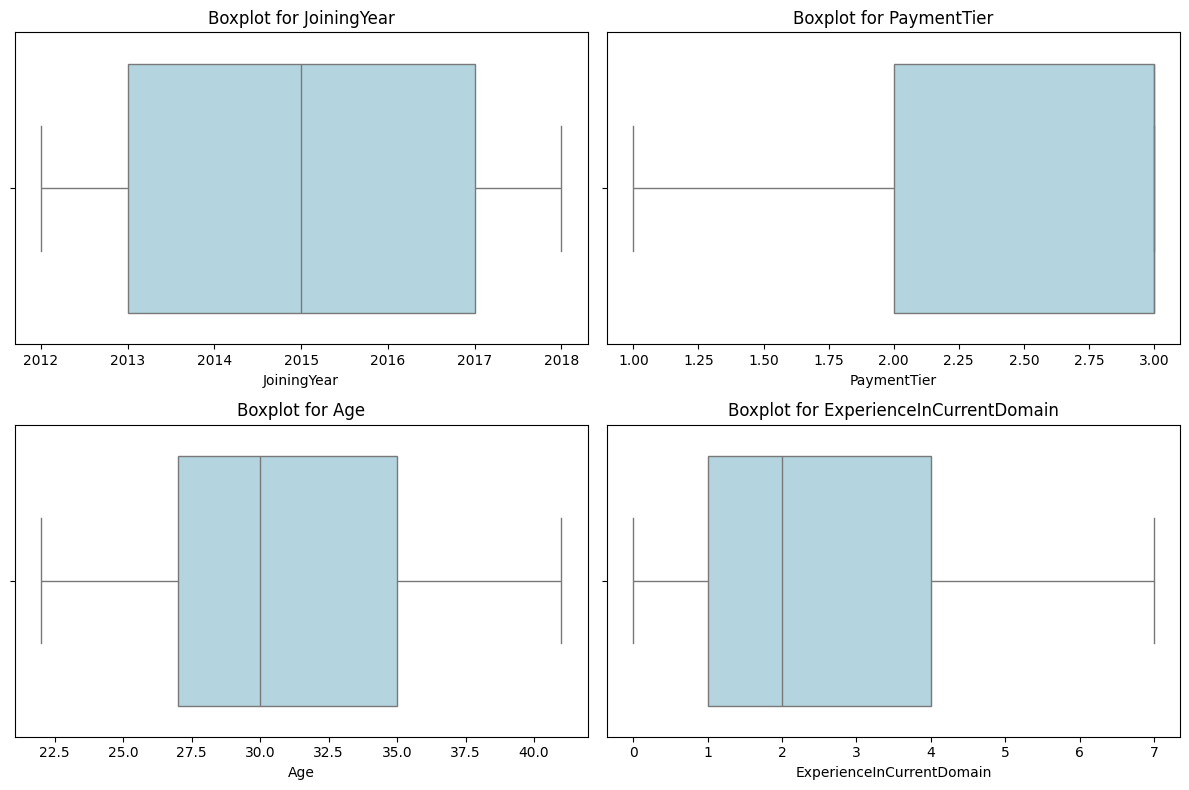

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()


### 2: Apply Suitable Feature Coding Techniques

In [ ]:
# One-hot encode categorical features
#If there are categorical variables, convert them into numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [ ]:
#Check

print(df.head())

   JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot  \
0         2017            3   34                          0           0   
1         2013            1   28                          3           1   
2         2014            3   38                          2           0   
3         2016            3   27                          5           1   
4         2017            3   24                          2           1   

   Education_Masters  Education_PHD  City_New Delhi  City_Pune  Gender_Male  \
0              False          False           False      False         True   
1              False          False           False       True        False   
2              False          False            True      False        False   
3               True          False           False      False         True   
4               True          False           False       True         True   

   EverBenched_Yes  
0            False  
1            False  
2          

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                2764 non-null   int64
 1   PaymentTier                2764 non-null   int64
 2   Age                        2764 non-null   int64
 3   ExperienceInCurrentDomain  2764 non-null   int64
 4   LeaveOrNot                 2764 non-null   int64
 5   Education_Masters          2764 non-null   bool 
 6   Education_PHD              2764 non-null   bool 
 7   City_New Delhi             2764 non-null   bool 
 8   City_Pune                  2764 non-null   bool 
 9   Gender_Male                2764 non-null   bool 
 10  EverBenched_Yes            2764 non-null   bool 
dtypes: bool(6), int64(5)
memory usage: 145.8 KB
None


### 3: Scale the numeric columns to standardize their values


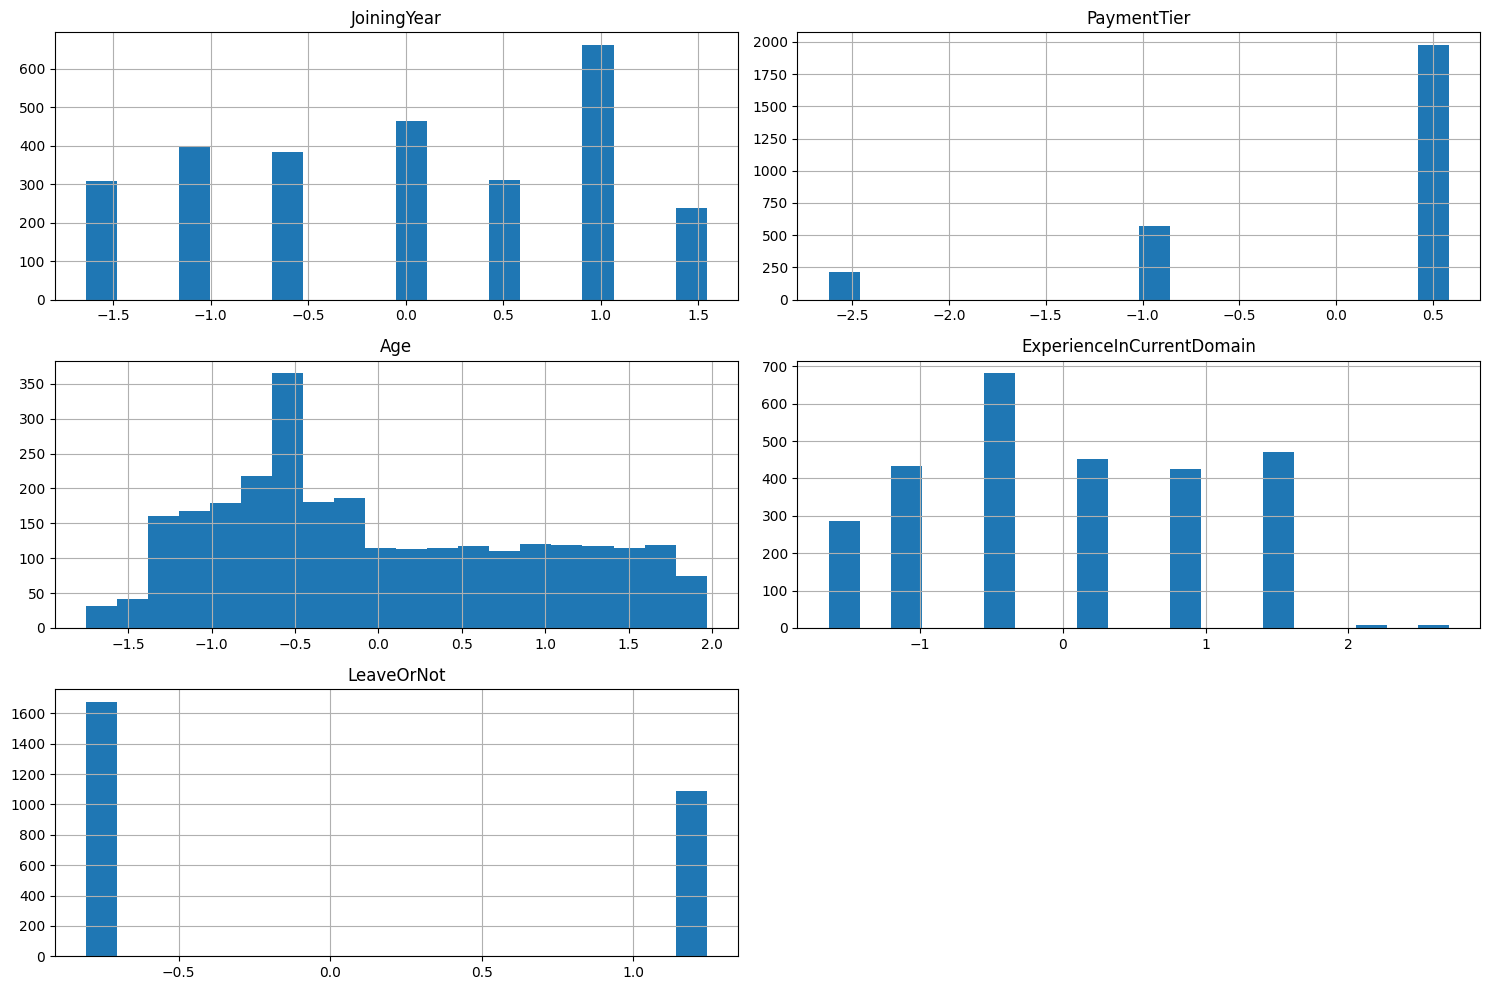

In [ ]:
# Standardize features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Visualize the effect of scaling
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


### 4: Applying Feature Discretization

In [ ]:
# Create an instance of KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

# Fit and transform the numeric columns to discretize them
df[numeric_cols] = discretizer.fit_transform(df[numeric_cols])


Visualize the Discretization

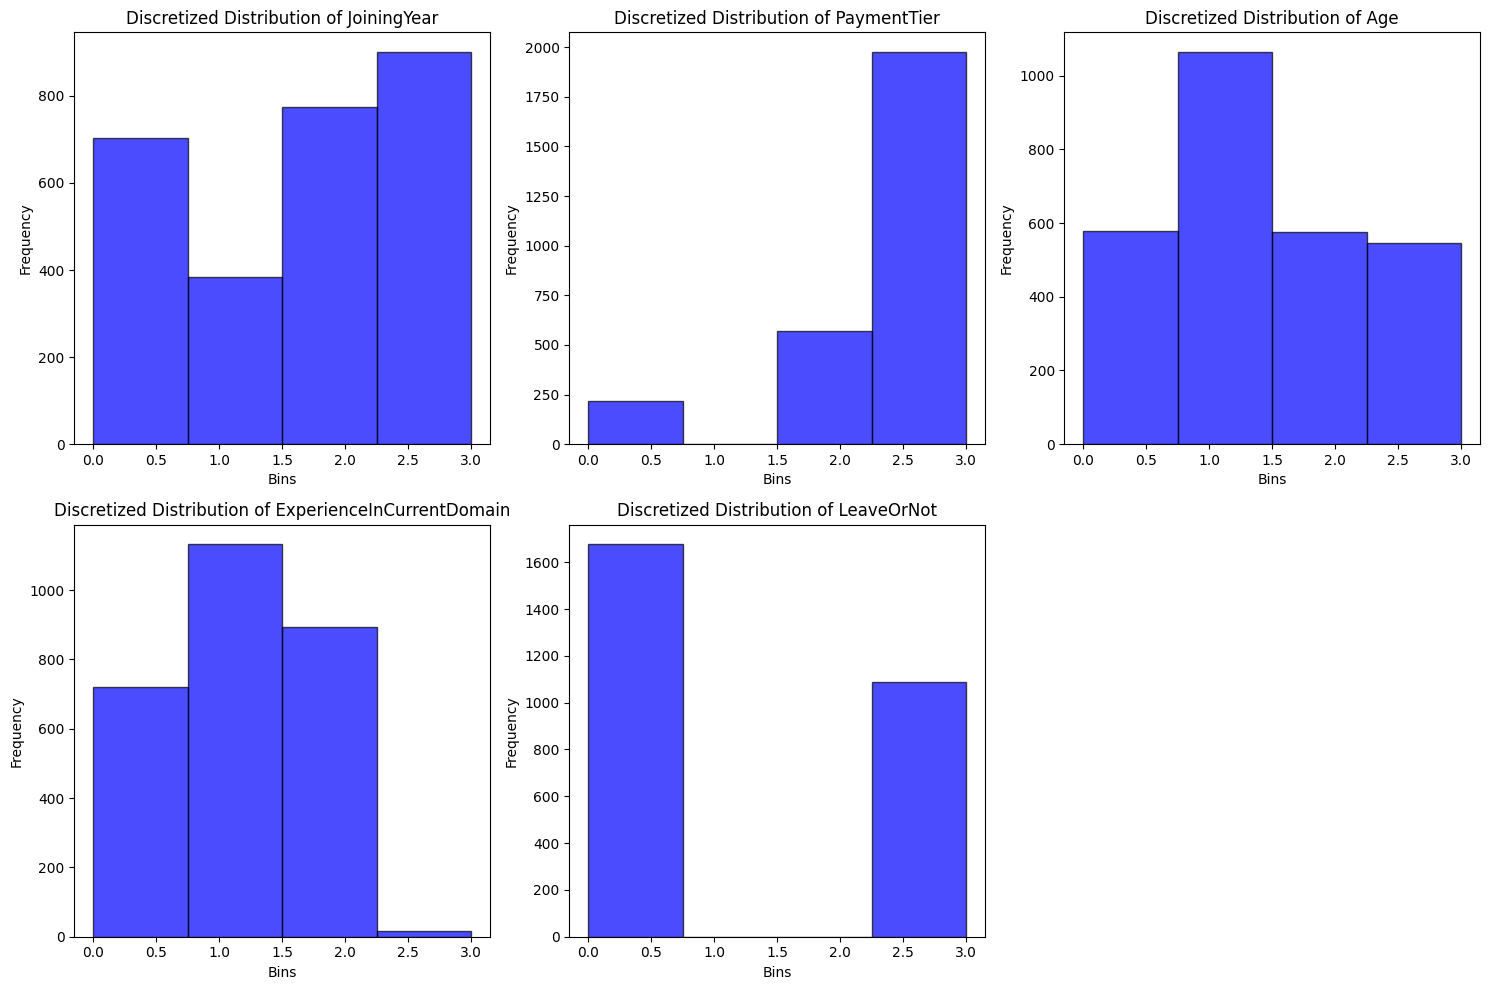

In [ ]:
# Plot histograms for each numeric column after discretization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)  # Adjust the subplot layout as needed
    plt.hist(df[col], bins=4, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Discretized Distribution of {col}')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## PART B
## MLP for binary classification

In [ ]:
# Split data into training and testing sets
X = df.drop('LeaveOrNot', axis=1).values  # Features
y = df['LeaveOrNot'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Build and train an MLP
mlp = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.85      0.79       333
         3.0       0.71      0.56      0.63       220

    accuracy                           0.74       553
   macro avg       0.73      0.71      0.71       553
weighted avg       0.73      0.74      0.73       553



### Model Traning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50, 25), (100, 50), (150, 75)],
    'max_iter': [100, 300, 500],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test)
print("Best Model (from GridSearchCV):")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.001, 'max_iter': 100}
Best Model (from GridSearchCV):
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       333
           1       0.70      0.56      0.62       220

    accuracy                           0.73       553
   macro avg       0.72      0.70      0.70       553
weighted avg       0.73      0.73      0.72       553



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Part 4
## Predict the value of Y


### 1. Different wight initialization techniques

In [ ]:
# Split data into training and testing sets
X = df.drop("LeaveOrNot", axis=1)  # Features
y = df["LeaveOrNot"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# SGD solver
mlp_sgd = MLPClassifier(hidden_layer_sizes=(50, 25), solver='sgd', random_state=42, learning_rate_init=0.01)
mlp_sgd.fit(X_train, y_train)

# Adam solver
mlp_adam = MLPClassifier(hidden_layer_sizes=(50, 25), solver='adam', random_state=42)
mlp_adam.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 25), random_state=42)

In [ ]:
# Evaluate
y_pred_sgd = mlp_sgd.predict(X_test)
y_pred_adam = mlp_adam.predict(X_test)

# classification report
print("SGD Solver:")
print(classification_report(y_test, y_pred_sgd))

print("Adam Solver:")
print(classification_report(y_test, y_pred_adam))

SGD Solver:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       333
           1       0.78      0.45      0.57       220

    accuracy                           0.73       553
   macro avg       0.75      0.68      0.69       553
weighted avg       0.74      0.73      0.71       553

Adam Solver:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       333
           1       0.69      0.54      0.61       220

    accuracy                           0.72       553
   macro avg       0.71      0.69      0.69       553
weighted avg       0.72      0.72      0.71       553



### 3. Different activation funtions

In [ ]:
# Split data
X = df.drop("LeaveOrNot", axis=1)  # Features
y = df["LeaveOrNot"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#ReLU activation

# SGD Solver
mlp_sgd_relu = MLPClassifier(hidden_layer_sizes=(50, 25), solver='sgd', activation='relu', random_state=42, learning_rate_init=0.01)
mlp_sgd_relu.fit(X_train, y_train)
# Adam Solver
mlp_adam_relu = MLPClassifier(hidden_layer_sizes=(50, 25), solver='adam', activation='relu', random_state=42)
mlp_adam_relu.fit(X_train, y_train)

#Tanh activation

#SGD Solver
mlp_sgd_tanh = MLPClassifier(hidden_layer_sizes=(50, 25), solver='sgd', activation='tanh', random_state=42, learning_rate_init=0.01)
mlp_sgd_tanh.fit(X_train, y_train)
#Adam Solver
mlp_adam_tanh = MLPClassifier(hidden_layer_sizes=(50, 25), solver='adam', activation='tanh', random_state=42)
mlp_adam_tanh.fit(X_train, y_train)

#Logistic activation

#SGD Solver
mlp_sgd_logistic = MLPClassifier(hidden_layer_sizes=(50, 25), solver='sgd', activation='logistic', random_state=42, learning_rate_init=0.01)
mlp_sgd_logistic.fit(X_train, y_train)
# Adam Solver
mlp_adam_logistic = MLPClassifier(hidden_layer_sizes=(50, 25), solver='adam', activation='logistic', random_state=42)
mlp_adam_logistic.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 25),
              random_state=42)

In [ ]:
y_pred_sgd_relu = mlp_sgd_relu.predict(X_test)
y_pred_adam_relu = mlp_adam_relu.predict(X_test)
y_pred_sgd_tanh = mlp_sgd_tanh.predict(X_test)
y_pred_adam_tanh = mlp_adam_tanh.predict(X_test)
y_pred_sgd_logistic = mlp_sgd_logistic.predict(X_test)
y_pred_adam_logistic = mlp_adam_logistic.predict(X_test)

In [ ]:
# Print classification report

print("SGD Solver with ReLU Activation:")
print(classification_report(y_test, y_pred_sgd_relu))

print("Adam Solver with ReLU Activation:")
print(classification_report(y_test, y_pred_adam_relu))

print("SGD Solver with Tanh Activation:")
print(classification_report(y_test, y_pred_sgd_tanh))

print("Adam Solver with Tanh Activation:")
print(classification_report(y_test, y_pred_adam_tanh))

print("SGD Solver with Logistic Activation (Sigmoid):")
print(classification_report(y_test, y_pred_sgd_logistic))

print("Adam Solver with Logistic Activation (Sigmoid):")
print(classification_report(y_test, y_pred_adam_logistic))

SGD Solver with ReLU Activation:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       333
           1       0.78      0.45      0.57       220

    accuracy                           0.73       553
   macro avg       0.75      0.68      0.69       553
weighted avg       0.74      0.73      0.71       553

Adam Solver with ReLU Activation:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       333
           1       0.69      0.54      0.61       220

    accuracy                           0.72       553
   macro avg       0.71      0.69      0.69       553
weighted avg       0.72      0.72      0.71       553

SGD Solver with Tanh Activation:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       333
           1       0.82      0.44      0.57       220

    accuracy                           0.74       553
   macro avg       0.77     

### 3. Trial-and-Error Based Hyperparameter Training

In [ ]:
# Experiment with different hyperparameters
mlp_tuned = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate_init=0.001, alpha=0.0001, random_state=42)
mlp_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = mlp_tuned.predict(X_test)
print("Tuned Model:")
print(classification_report(y_test, y_pred_tuned))


Tuned Model:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       333
           1       0.68      0.52      0.59       220

    accuracy                           0.71       553
   macro avg       0.70      0.68      0.68       553
weighted avg       0.71      0.71      0.70       553



## PART D
## Evaluate the performance

Unique values in y before mapping: [0 1]
NaN values in y_train before fitting: 0
NaN values in y_test before fitting: 0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.71
F1 Score: 0.58


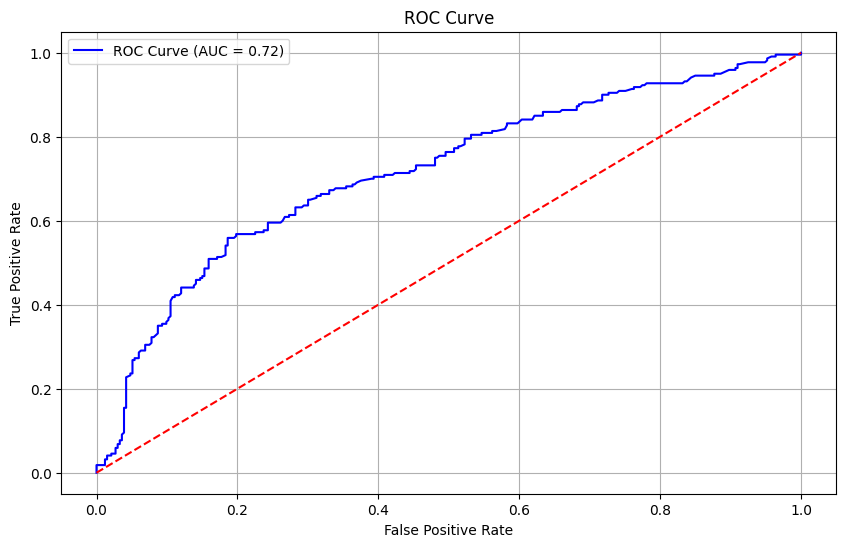

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Split data into training and testing sets
X = df.drop("LeaveOrNot", axis=1)  # Features
y = df["LeaveOrNot"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check unique values in y
print("Unique values in y before mapping:", y.unique())

# Verify NaN values in y_train and y_test
print("NaN values in y_train before fitting:", y_train.isna().sum())
print("NaN values in y_test before fitting:", y_test.isna().sum())

# Drop any NaN values if they exist
y_train = y_train.dropna()
y_test = y_test.dropna()

# Align X_train with y_train after dropping NaN values
X_train = X_train.loc[y_train.index]

# Initialize and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(50, 25), solver='sgd', random_state=42)
mlp.fit(X_train, y_train)  # Fit the model with the cleaned data

# Make predictions
y_pred = mlp.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# Calculate ROC curve
y_prob = mlp.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
